<a href="https://colab.research.google.com/github/AkashMuttalwad/Capstone-Project-propensity-model_1/blob/main/Copy_of_Capstone_Project_propensity_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Capstone Project : Propensity model**

# Problem Description
We have larage number of customers. our seles team would like to call potantial customers who can buy our service. we don't have enough manpower and time to call and reach every customer and conviance them for our products also we need to rank customers so that we could after them our product and services with discounted services

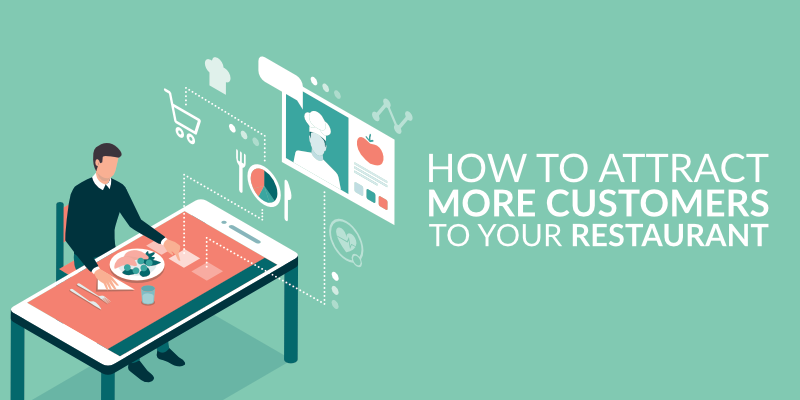

# Data Description

The dataset contains weather information (Customers segmentaion,Potenstial vs Non potenstial Customers,when can buy our services in current month ,Customer lifetime value(live vs dead Customers ,Chart anlysis ,Lifetime package )
the number of priemum customer who can get discuant on our services. 

# **Attribute Information:**
### high value customer  - count high value spended customers 
### low value customer -count low value spended customers
### daily customer  - %
### daily revanue - total business in a day 
### products  - menu 
###Random customers  - ordnary cutomers 
###customer  - live or dead 
### fastival day  - customer frequancy on fastival days 
### Seasons - Winter,Summer,rainy
### Holiday - Holiday/No holiday
###  Customer count - Count a customer on each day

# **Importing Library and connecting drive**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style 
from numpy import *
import datetime as dt
import missingno as msno

In [27]:
from google.colab import drive
df = pd.read_excel('/content/drive/MyDrive/Python/Online Retail.xlsx')
df.head()
df1 = df
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **Exploratory Data Analysis(EDA)**

In [28]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [29]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [30]:
# Total Transaction: 541909
df.shape

(541909, 8)

In [31]:
# Null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [32]:
# Checking the missing values

miss_values = df.columns[df.isnull().any()]
print(f"Missing values:\n{df[miss_values].isnull().sum()}")

null_values = df.columns[df.isna().any()]
print(f"Null values:\n{df[null_values].isna().sum()}")

Missing values:
Description      1454
CustomerID     135080
dtype: int64
Null values:
Description      1454
CustomerID     135080
dtype: int64


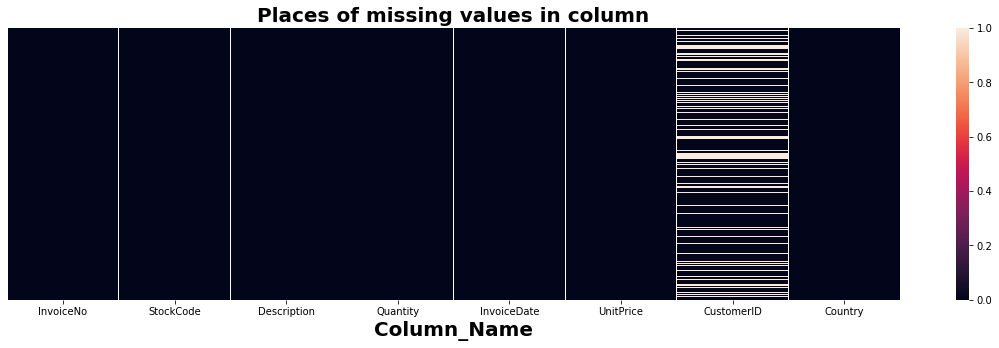

In [33]:
#  missin Values in our dataset
plt.figure(figsize=(20, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=20, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=20)
plt.show()

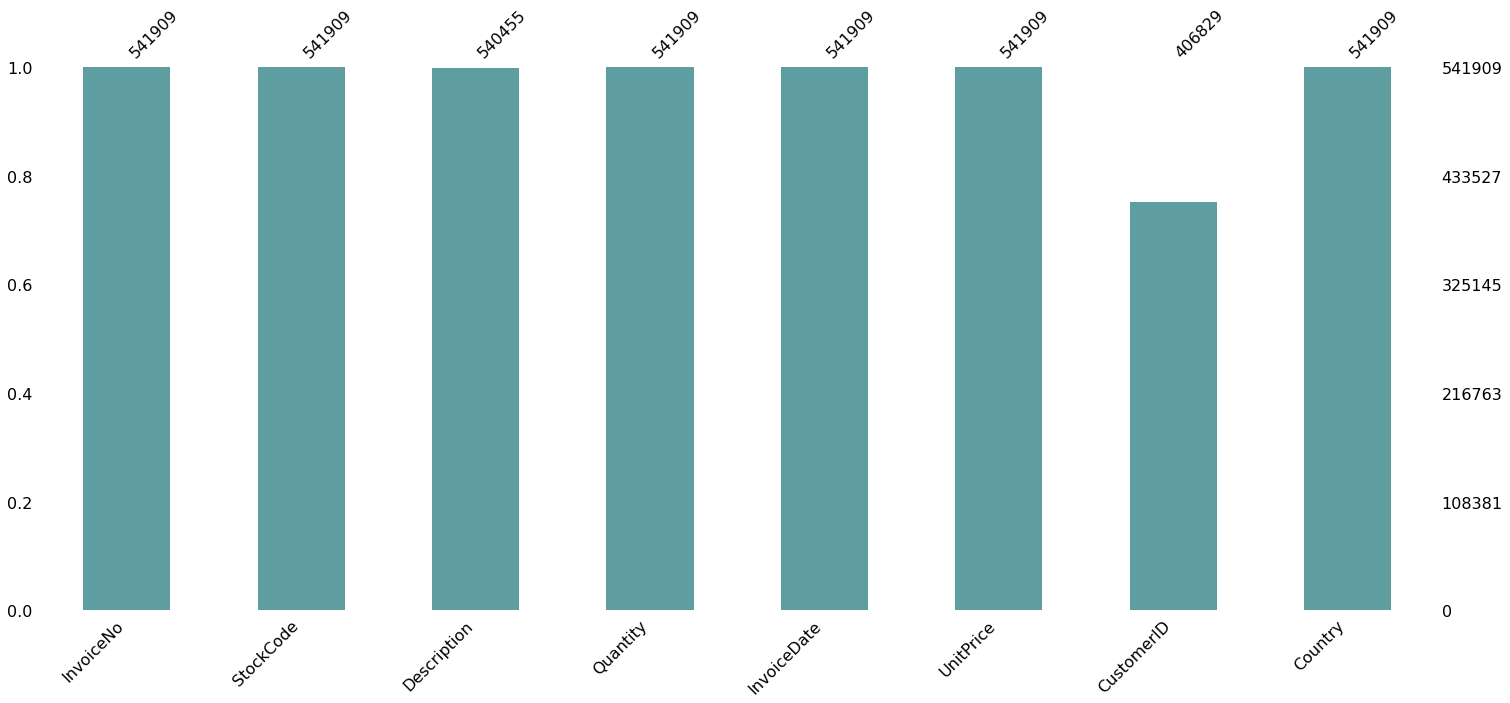

In [34]:
null_plot = msno.bar(df, color = "#5F9EA0")

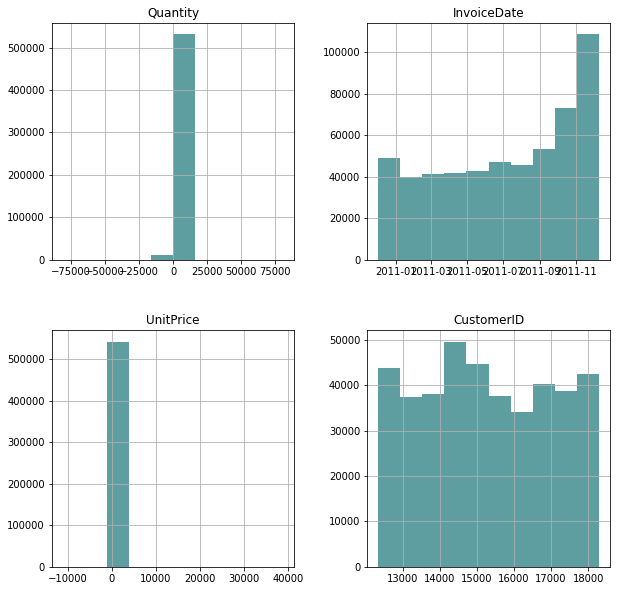

In [35]:
df_hist_plot = df.hist(figsize = (10,10), color = "#5F9EA0")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


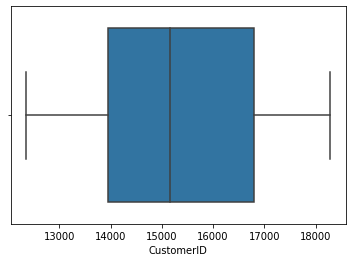

In [36]:
#Dependant Customers 
sns.boxplot(df['CustomerID'])

In [37]:
#Unique Countrys from data 
df.Country.nunique()

38

In [38]:
#Analyzing the data further, we find that most of the data (more than 90%) is for transactions that happened in United Kingdom.
customer_country=df[['Country','CustomerID']].drop_duplicates()
customer_country.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [39]:
#We will first group by country then aggregate over customerID to find out number of customers from each country.
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [43]:
#So there are 133600 null values in customerID. We will have to remove these nulls.
df1=df1.loc[df1['Country']=='United Kingdom']
df1.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [44]:
#Now our data does not have any null values. But we still need to check for any negative values that might be present.
df1=df1[pd.notnull(df1['CustomerID'])]
df1.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [45]:
#we see that quantity has some negative values. So we remove them.
df1.Quantity.min()
df1.UnitPrice.min()

0.0

In [46]:
#Now lets see how our data is structured.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [ ]:
df1.shape

(354345, 8)

In [50]:

#Now lets add a total price column which will be UnitPrice * Quantity
df1['Total Price']=df1['UnitPrice']*df1['Quantity']
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [87]:
#Find the last order date in our data:
df1.InvoiceDate.max()


Timestamp('2011-12-09 12:49:00')

So for recency we will take 2011–12–10 as our reference date.

In [88]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [89]:
#Find the last order date in our data:
df1.InvoiceDate.max()
#So for recency we will take 2011–12–10 as our reference date.
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [90]:
df1['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
rfmTable=df1.groupby('CustomerID').agg({'InvoiceDate':lambda x:(NOW-x.max()).days,'InvoiceNo':lambda x:len(x),'Total Price':lambda x: x.sum()})
rfmTable.head()

,InvoiceDate,InvoiceNo,Total Price
CustomerID,,,
12346.0,325,2,0.00
12747.0,2,103,4196.01
12748.0,0,4642,29072.10
12749.0,3,231,3868.20
12820.0,3,59,942.34


#‘Now’ is a date type object; so for data processing, we will convert the InvoiceDate column into pandas date object. Next we groupby CustomerID and aggregate using lambda functions.
#For InvoiceDate- we want the number days between the last date (Now) and last date of purchase for a particular customer.
#len(x) will give us how many distinct times the customer has purchased.
#Total Price is the sum of all the item’s prices in the invoice.
#lets rename these columns as frequency, monetary and recency

# Insight: We can definitely say that 1st customer is not our top customer because he purchased only once 325 days ago.

In [55]:
rfmTable.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total Price':'monetary_value'},inplace=True)
rfmTable.head()

,Recency,Frequency,monetary_value
CustomerID,,,
12346.0,325,2,0.00
12747.0,2,103,4196.01
12748.0,0,4642,29072.10
12749.0,3,231,3868.20
12820.0,3,59,942.34


In [57]:
rfmTable.describe()

,Recency,Frequency,monetary_value
count,3950.000000,3950.000000,3950.000000
mean,91.323038,91.614684,1713.385669
std,100.236848,220.557389,6548.608224
min,0.000000,1.000000,-4287.630000
25%,16.000000,17.000000,282.255000
50%,50.000000,41.000000,627.060000
75%,143.000000,101.000000,1521.782500
max,373.000000,7983.000000,256438.490000


# our aim is to find customers who have lowest recency, and high monetary value and frequency.

# So for recency, If the actual value of number of days of customer’s most recent purchase is less than 17, we will assign that customer a score of 4, If it is less than 50 a score of 3 and so on.

In [ ]:
#lets put these customers into bins. We will categorize each customers into quartiles — [0.25,0.5,0,75]. So 0.25 is 25th percentile, 0.5 is 50th percentile and so on.
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'monetary_value': {0.25: 300.03999999999996,
  0.5: 651.8199999999999,
  0.75: 1575.89}}

What this means is- lets take frequency: for 0.25 quantile we have 17. So this says that 25% of values are less than 17, 50% values are less than 41 and so on.

In [60]:
def RScore(x,p,quantiles):
    if x<=quantiles[p][0.25]:
        return 4
    elif x<=quantiles[p][0.5]:
        return 3
    elif x<=quantiles[p][0.75]:
        return 2
    else:
        return 1
def FMScore(x,p,quantiles):
    if x<=quantiles[p][0.25]:
        return 1
    elif x<=quantiles[p][0.5]:
        return 2
    elif x<=quantiles[p][0.75]:
        return 3
    else:
        return 4

In [128]:

df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['F_rank'] = df['InvoiceNo'].rank(ascending=True)
df['M_rank'] = df['InvoiceNo'].rank(ascending=True)
 
# normalizing the rank of the customers
df['R_rank_norm'] = (df['R_rank']/df['R_rank'].max())*100
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['R_rank'] = df['CustomerID'].rank(ascending=False)

 
df['R_rank'] = df['CustomerID'].rank(ascending=False)

 
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Customer_segment,R_rank,F_rank,M_rank,R_rank_norm
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Top Customers,23573.5,NaN,NaN,5.794456
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Top Customers,23573.5,NaN,NaN,5.794456
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Top Customers,23573.5,NaN,NaN,5.794456
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Top Customers,23573.5,NaN,NaN,5.794456
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Top Customers,23573.5,NaN,NaN,5.794456


In [134]:
frequency_df = df.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [137]:

df['Total'] = df['Customer_segment']*df['Quantity']
monetary_df = df.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,Top CustomersTop CustomersTop CustomersTop Cus...
1,12347.0,Top CustomersTop CustomersTop CustomersTop Cus...
2,12348.0,Top CustomersTop CustomersTop CustomersTop Cus...
3,12349.0,Top CustomersTop CustomersTop CustomersTop Cus...
4,12350.0,Top CustomersTop CustomersTop CustomersTop Cus...


In [141]:

rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(
    columns='Monetary')
rfm_df.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [144]:
rfm_df['R_rank'] = rfm_df['CustomerID'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['CustomerID'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerID,Frequency,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,2,100.000000,2.493138,2.493138
1,12347.0,182,99.977127,88.129003,88.129003
2,12348.0,31,99.954254,42.074565,42.074565
3,12349.0,73,99.931382,66.720037,66.720037
4,12350.0,17,99.908509,24.794145,24.794145


In [146]:

rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,12346.0,0.86
1,12347.0,4.50
2,12348.0,2.54
3,12349.0,3.59
4,12350.0,1.80
5,12352.0,3.87
6,12353.0,0.96


In [148]:

rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,12346.0,0.86,Lost Customers
1,12347.0,4.50,High value Customer
2,12348.0,2.54,Low Value Customers
3,12349.0,3.59,Medium Value Customer
4,12350.0,1.80,Low Value Customers
5,12352.0,3.87,Medium Value Customer
6,12353.0,0.96,Lost Customers
7,12354.0,3.31,Medium Value Customer
8,12355.0,1.56,Lost Customers
9,12356.0,3.33,Medium Value Customer


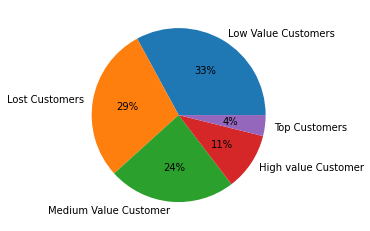

In [150]:

plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
#The head() function is used to get the first n rows. 
df.head ()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#The describe() method returns description of the data in the DataFrame
df.describe ()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#top 20 Data frome data set
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
#bottom 20 Data frome data set
df.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France


In [ ]:
#To find NULL values:
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [ ]:
#to find total numers of Null values in data 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# dropna method to drop Null values
df1= df.dropna(subset=['CustomerID'])
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
